# 투빅스 16기 정규세션 Week1 EDA - 16기 강동인

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

In [233]:
data = pd.read_csv("assignment_data.csv", encoding="UTF8")

# Data Set Description

a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. 



1.   Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else. **이직여부**
2. Age: 18 to 60 years old **나이** 
3. Gender: Female or Male **성별**
4. Department: Research & Development, Sales, Human Resources. **부서**
5. BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel. **출장빈도**
6. DistanceFromHome: Distance between the company and their home in miles. **출퇴근거리**
7. MonthlyIncome: Employees' numeric monthly income. **월수입**
8. MaritalStatus: Married, Single, Divorced. **결혼 여부**
9. Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'. **교육**
10. EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other. **분야 (교육)**
11. EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **환경 만족도**
12. RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **관계 만족도**
13. JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. 
14. JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc **직무 역할**
15. JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **직무 만족도**
16. OverTime: Whether they work overtime or not. **야근(초과근무)**
17. NumCompaniesWorked: Number of companies they worked for before joinging IBM. **IBM 재직 전 근무한 기업 수**
18. PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'. **성능 평가**
19. YearsAtCompany: Years they worked for IBM. **IBM 재직 년수**
20. WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. **워라밸**
21. YearsSinceLastPromotion: Years passed since their last promotion.**마지막으로 승진한 후로부터 몇 년이 지났는지**




In [234]:
print('The total number of rows:{} and columns:{}'.format(data.shape[0],data.shape[1]))
data.head()

The total number of rows:1470 and columns:35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

본래 Categorical 변수이지만 Numerical 변수로 표현되어 있는 feature의 Dtype을 object로 바꿔준다.
-> Education, EnvironmentSatisfaction, JobInvolvement, RelationshipSatisfaction, JobSatisfaction,PerformanceRating, WorkLifeBalance, JobLevel

In [376]:
data = data.astype({'Education':object,"EnvironmentSatisfaction" :object, "JobInvolvement":object,"RelationshipSatisfaction":object, "JobSatisfaction": object, "PerformanceRating":object,"WorkLifeBalance":object, "JobLevel": object})

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   object
 14  JobRole                 

In [238]:
data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [239]:
data.describe(include = 'object')

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,9,4,3,1,2,2,4,4
top,No,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,Sales Executive,4,Married,Y,No,3,3,3
freq,1233,1043,961,572,606,453,882,868,326,459,673,1470,1054,1244,459,893


### 결측치 확인

In [240]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

-> 결측치는 없음을 확인할 수 있다.

## Categorical 변수와 Numerical 변수를 나누어 살펴본다

In [241]:
numerical_cols = []
for column in data.columns:
    if data[column].dtype != object:
        numerical_cols.append(column)
        print('---------------------------------------------------------------------------------------')
        print(column)

---------------------------------------------------------------------------------------
Age
---------------------------------------------------------------------------------------
DailyRate
---------------------------------------------------------------------------------------
DistanceFromHome
---------------------------------------------------------------------------------------
EmployeeCount
---------------------------------------------------------------------------------------
EmployeeNumber
---------------------------------------------------------------------------------------
HourlyRate
---------------------------------------------------------------------------------------
JobLevel
---------------------------------------------------------------------------------------
MonthlyIncome
---------------------------------------------------------------------------------------
MonthlyRate
---------------------------------------------------------------------------------------
NumCompaniesWo

In [242]:
category_cols = []
for column in data.columns:
    if data[column].dtype == object:
        category_cols.append(column)
        print('---------------------------------------------------------------------------------------')
        print(f'{column} : {data[column].unique()}')
        print(f'{data[column].value_counts()}')
        print()

---------------------------------------------------------------------------------------
Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

---------------------------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

---------------------------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

---------------------------------------------------------------------------------------
Education : [2 1 4 3 5]
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

---------------------------------------------------------------------------------------
EducationF

-> EmployeeCount는 모든 값이 1이므로 제거한다.

-> StandardHours는 모든 값이 80으로 EDA에서 영향을 주지 않을 것이라고 판단하여 제거한다.

-> Over18는 모든 값이 Y이므로 제거한다.


In [243]:
dropped_cols = ['EmployeeCount','StandardHours','Over18']
data.drop(['EmployeeCount'], axis =1 , inplace = True)
data.drop(['StandardHours'], axis =1 , inplace =True)
data.drop(['Over18'], axis =1 , inplace =True)

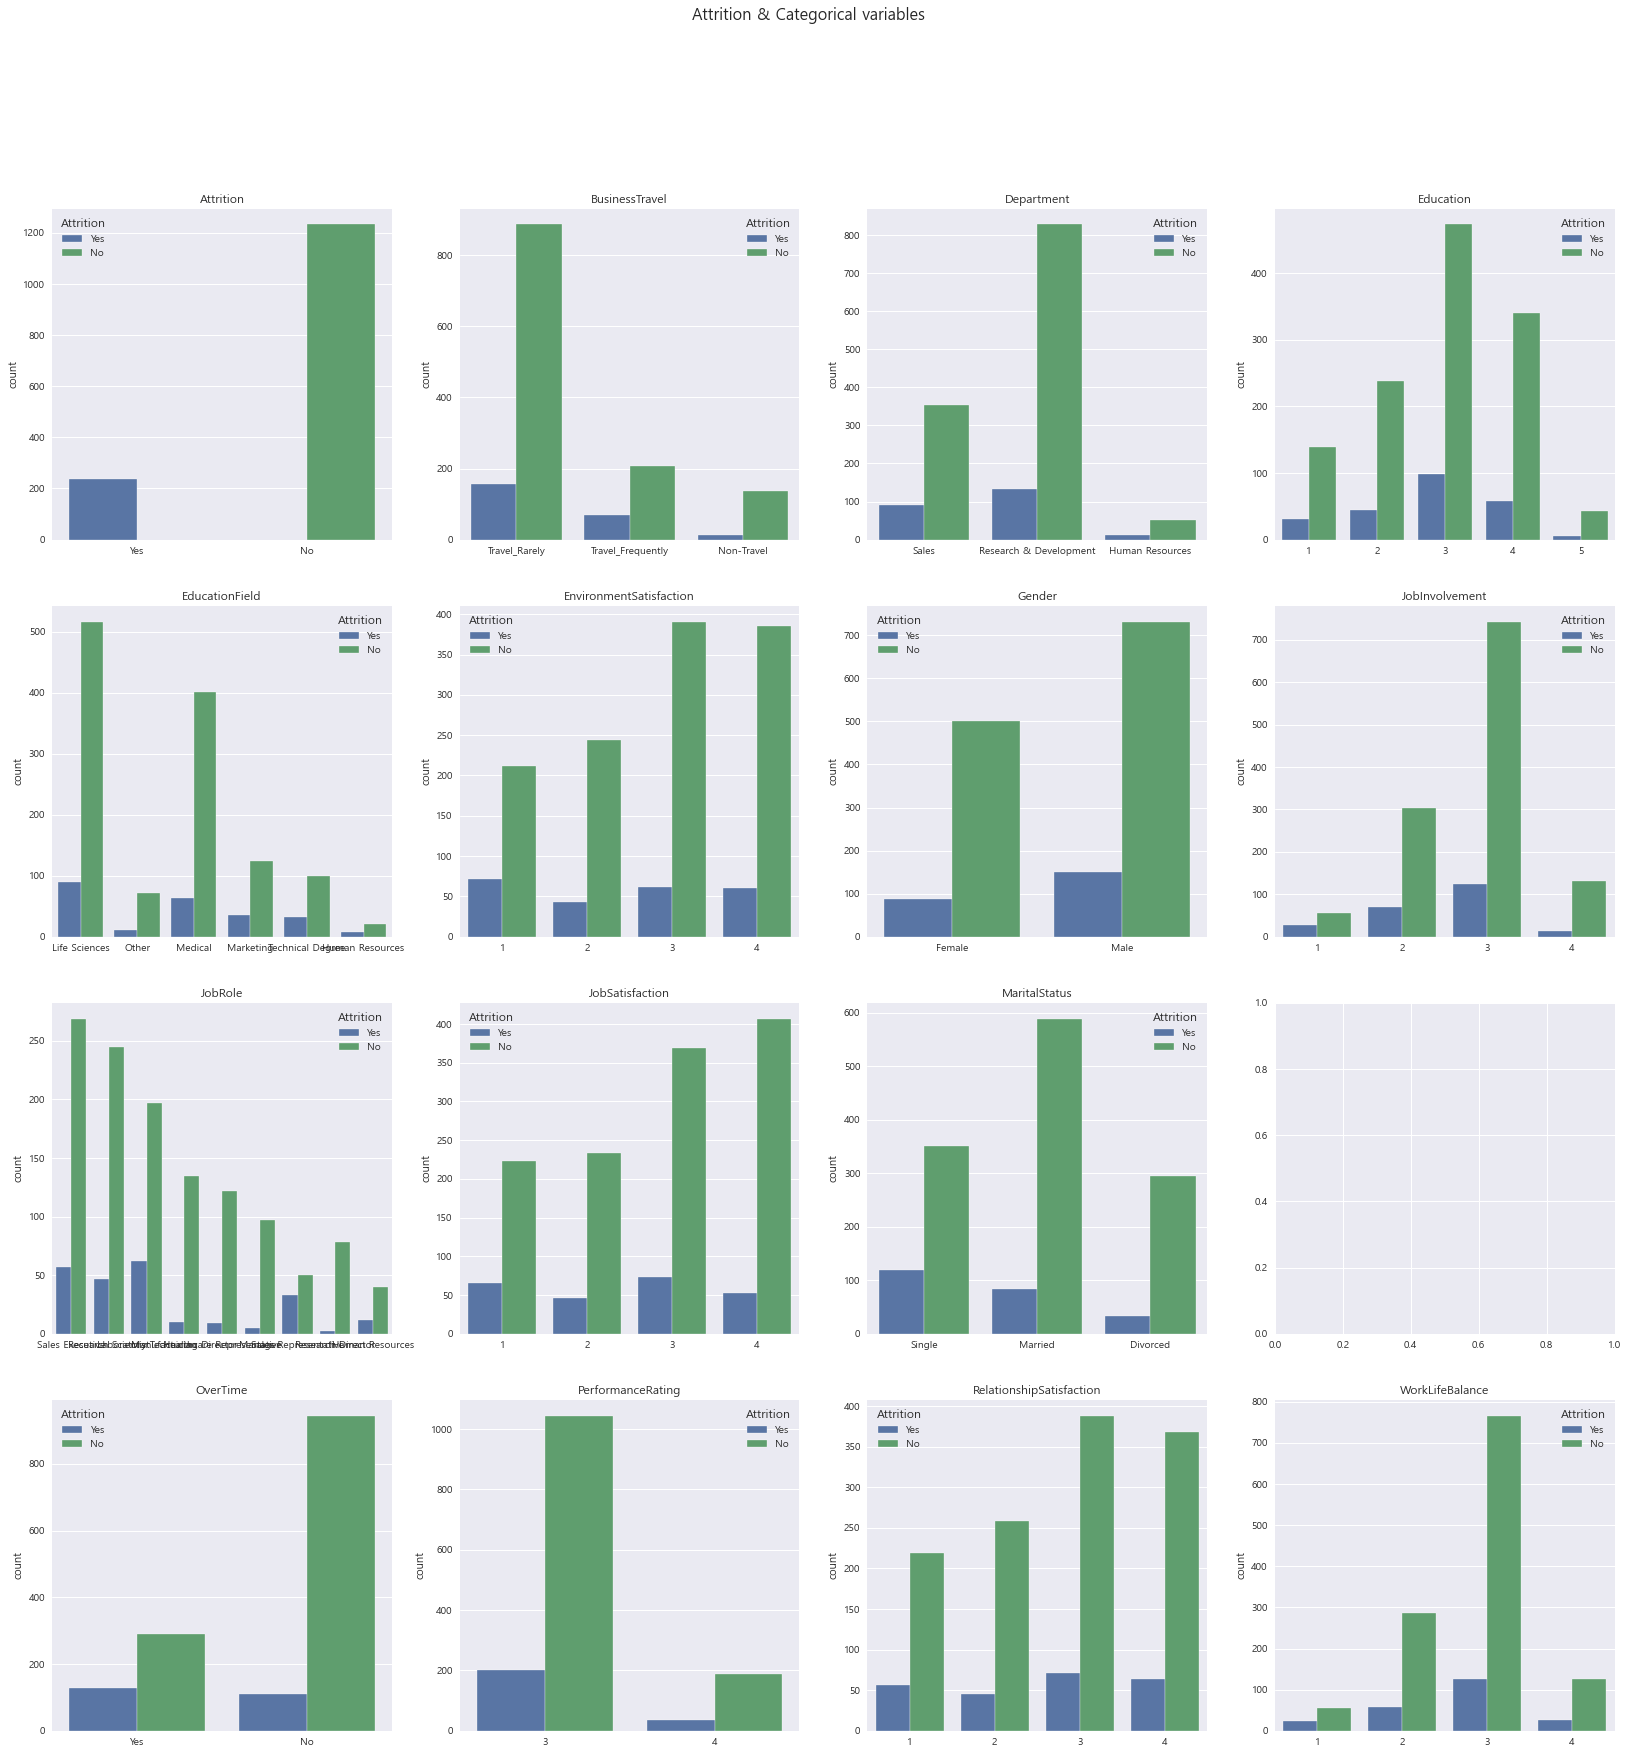

In [256]:
fig, ax = plt.subplots(4, 4, figsize=(28, 28))
ax = ax.flatten()
fig.suptitle('Attrition & Categorical variables', fontsize=16)

for i in range(len(category_cols)):
    if category_cols[i] in dropped_cols:
        continue
    sns.countplot(x=category_cols[i], data=data,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = category_cols[i])
  
        
plt.show()

범주형 변수를 이직여부를 기준으로 시각화해본결과 Department, BusinessTravel,EducationField,JobInvolvement, MaritalStatus,Overtime,WorklifeBalance 에 관한 더 살펴볼 필요가 있다고 판단된다.

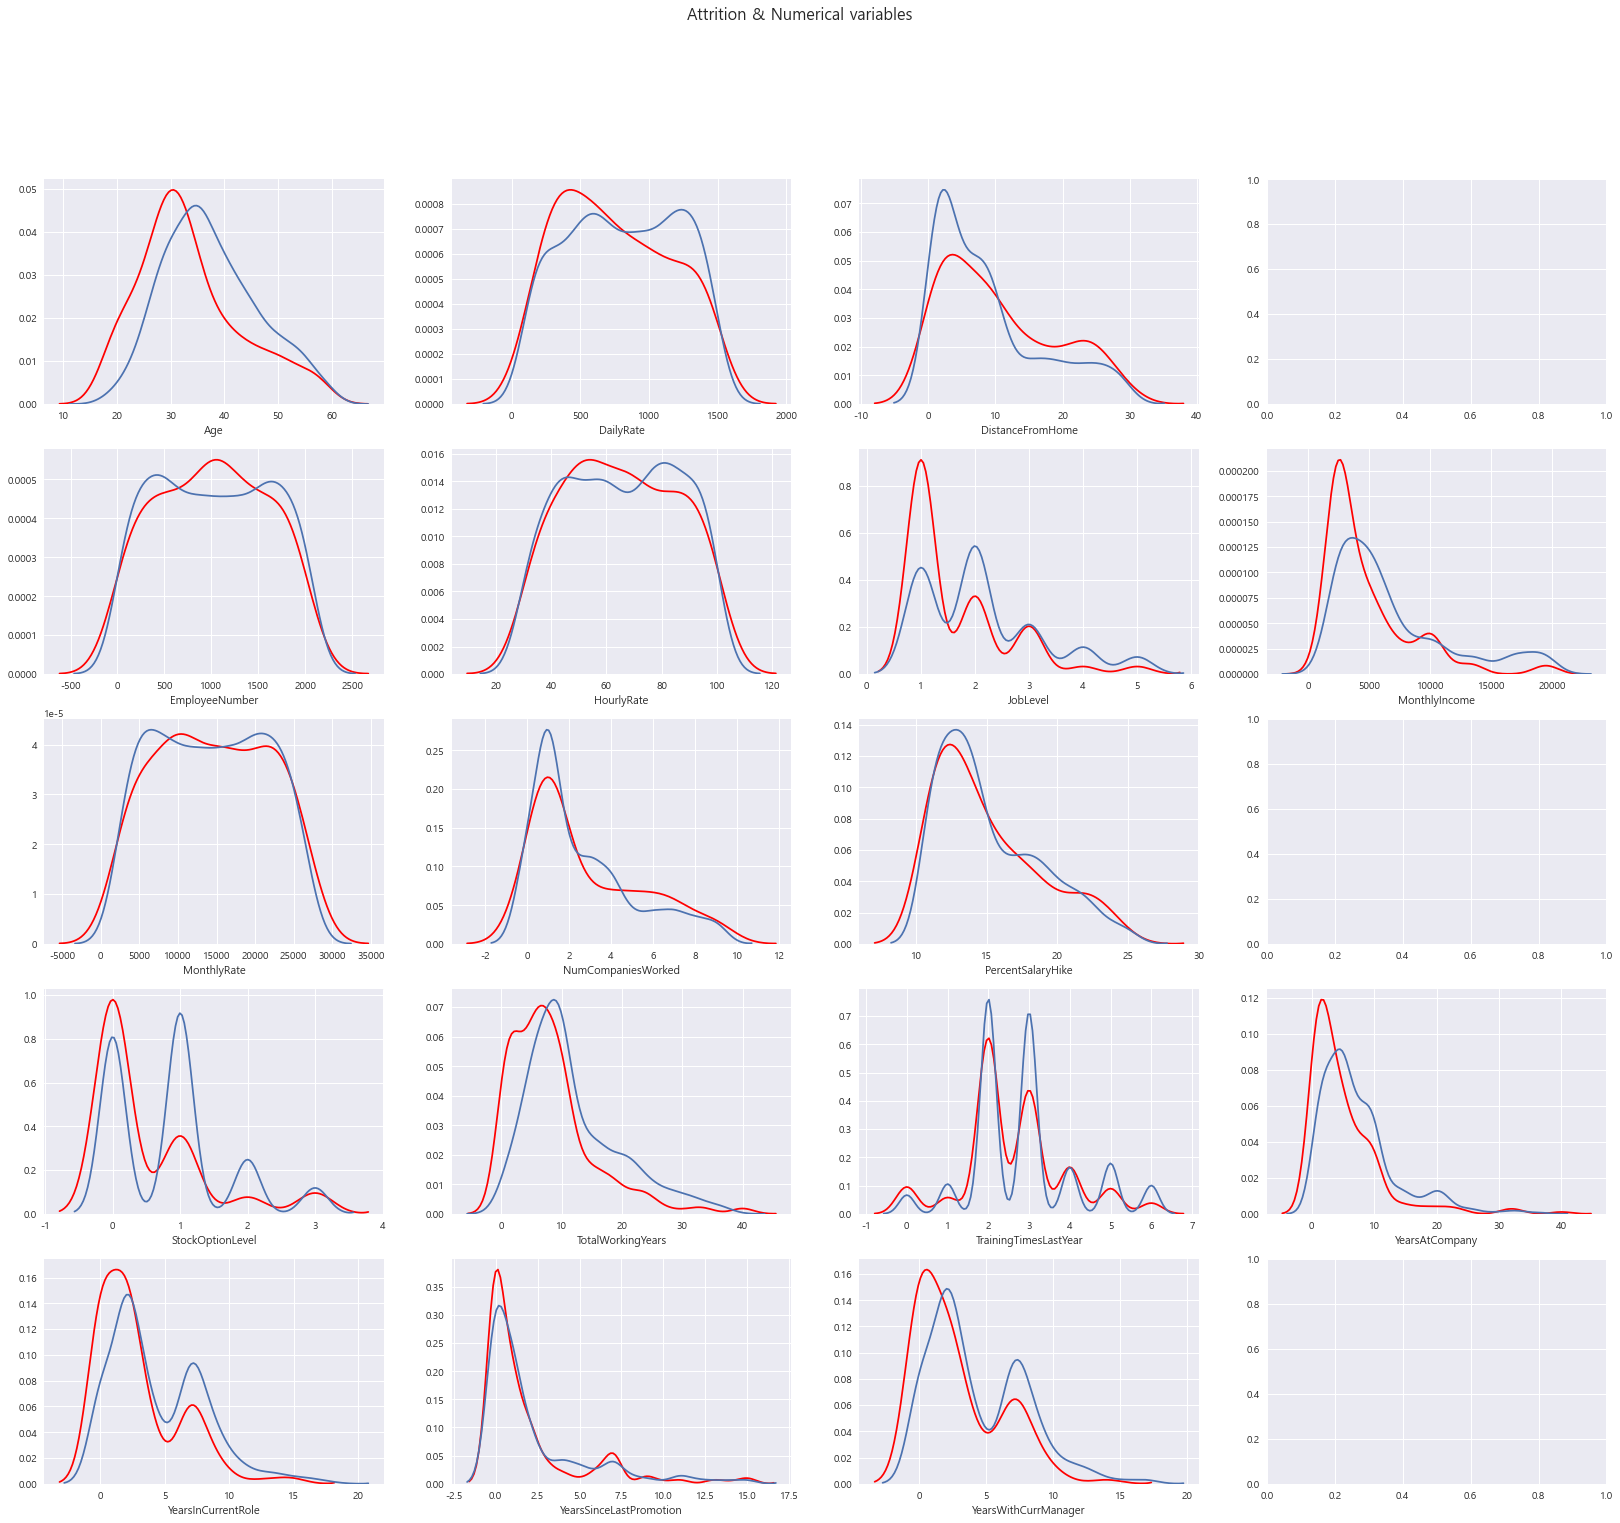

In [257]:
fig, ax = plt.subplots(5, 4, figsize=(28, 24), )
ax = ax.flatten()
fig.suptitle('Attrition & Numerical variables', fontsize=16)

for i in range(len(numerical_cols)):
    if numerical_cols[i] in dropped_cols:
        continue
    sns.distplot(data[data['Attrition'] == 'Yes'][numerical_cols[i]], color='Red', ax=ax[i], hist = False)
    sns.distplot(data[data['Attrition'] == 'No'][numerical_cols[i]], ax=ax[i],hist = False)
    
plt.show()

job level, monthlyincome, StockoptionLevel 에 대해 더 분석해볼 필요가 있다고 판단된다.

## 변수간의 상관관계 확인

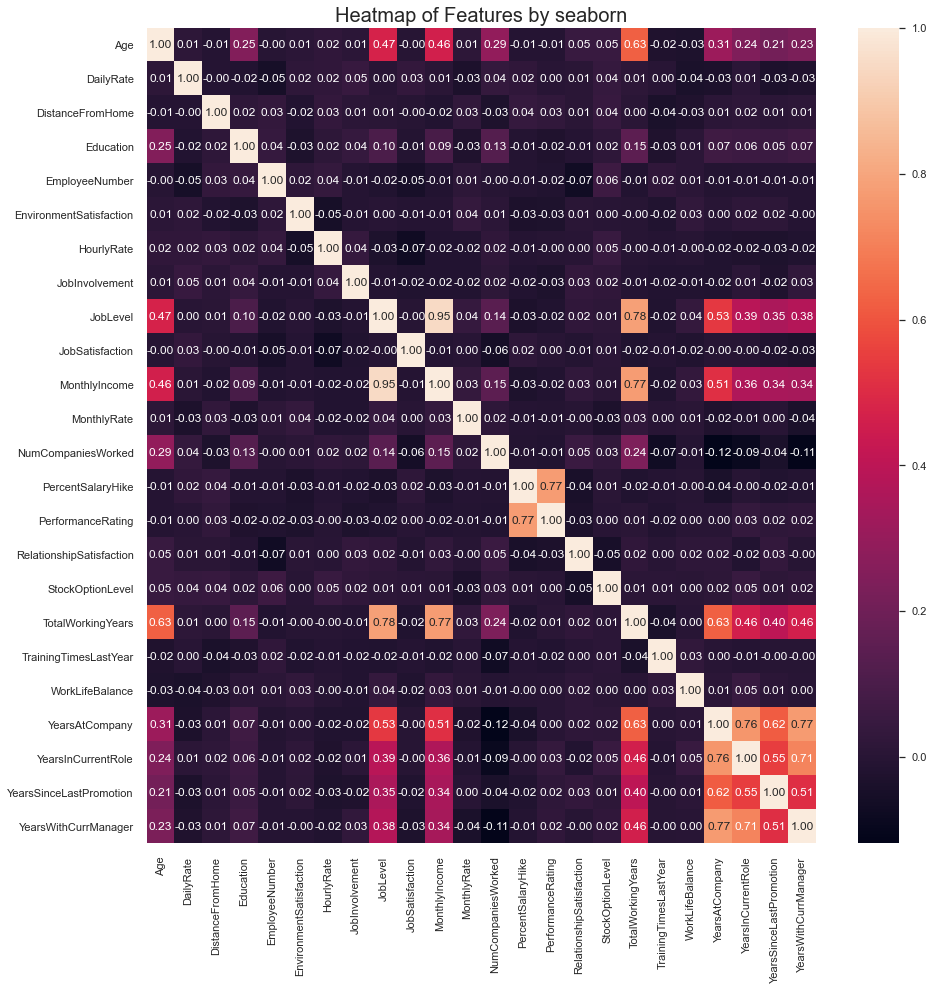

In [165]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot= True, fmt = ".2f")

plt.title('Heatmap of Features by seaborn',fontsize=20)

plt.show()

상관계수의 해석 기준은 다음과 같다.
- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

-> 상관관계가 높은 피쳐들은 추후에 상관관계 분석에 참고하도록 한다.

## EDA


### Age

In [105]:
data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

18부터 60 까지 6단위로 binning을 진행함

In [112]:
bins = [17,24,30,36,42,48,54,60]

In [113]:
data['Age_cut'] = pd.cut(data['Age'], bins= bins)
data['Age_cut']

0       (36, 42]
1       (48, 54]
2       (36, 42]
3       (30, 36]
4       (24, 30]
          ...   
1465    (30, 36]
1466    (36, 42]
1467    (24, 30]
1468    (48, 54]
1469    (30, 36]
Name: Age_cut, Length: 1470, dtype: category
Categories (7, interval[int64]): [(17, 24] < (24, 30] < (30, 36] < (36, 42] < (42, 48] < (48, 54] < (54, 60]]

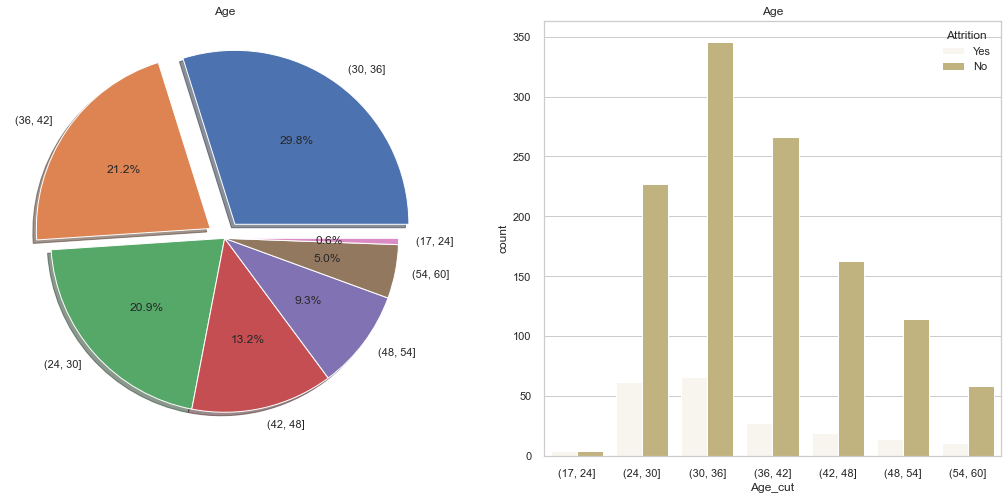

Attrition   No  Yes
Age_cut            
(17, 24]     4    4
(24, 30]   227   62
(30, 36]   346   66
(36, 42]   266   27
(42, 48]   163   19
(48, 54]   114   14
(54, 60]    58   11


In [181]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Age_cut'].value_counts().plot.pie(explode=[0.1, 0.1,0,0,0,0,0],
                                         autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True)
ax[0].set_title('Age')
ax[0].set_ylabel('')

sns.countplot('Age_cut', data=data, ax=ax[1], hue ='Attrition', color = 'y')
ax[1].set_title('Age')
plt.show()

print(pd.crosstab(data['Age_cut'],data['Attrition']))

-> 24 ~ 42세가 많은 부분을 차지하고 있으며, 모든 연령대에서 남성이 더 많다.

binning한 Age를 바탕으로 각 bin별 연령분포를 나타내면 다음과 같다.

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='Age'>

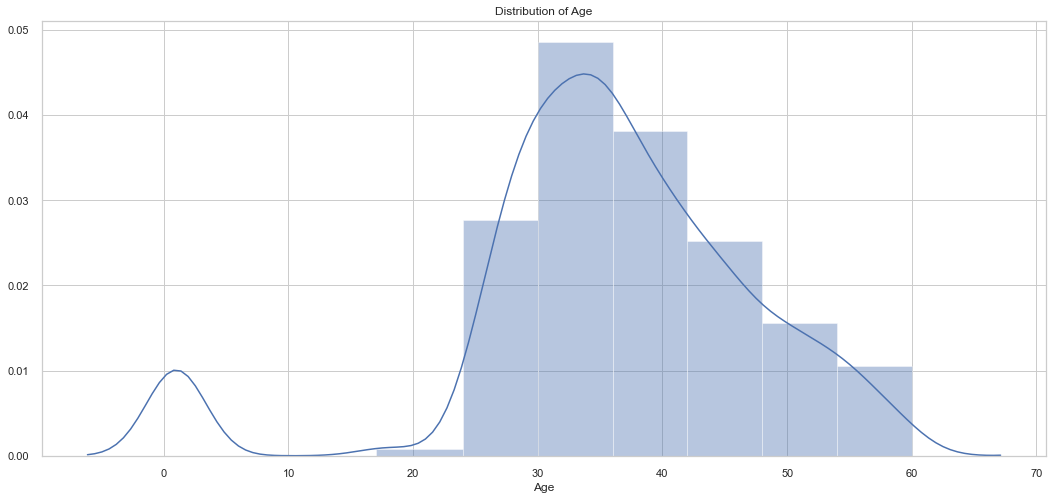

In [190]:
plt.figure(figsize=(18,8))
plt.title('Distribution of Age')
sns.distplot(data['Age'], bins= bins)

<AxesSubplot:xlabel='Age_cut'>

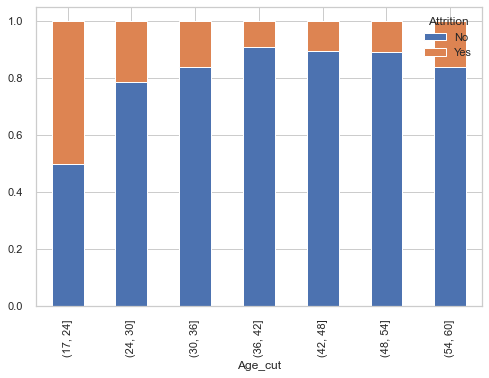

In [187]:

data.groupby("Age_cut")['Attrition'].value_counts(normalize=True).unstack().plot(kind="bar", 
                                                                              legend=True , 
                                                                              stacked= True ,
                                                                        
                                                                              )


나이대별 이직여부는 (17,24]집단이 가장 많았으나 해당 집단은 표본수가 적기 때문에(8/1470) (24,30] 집단에서 가장 이직이 많이 일어남을 알 수 있다.

### Gender & Department

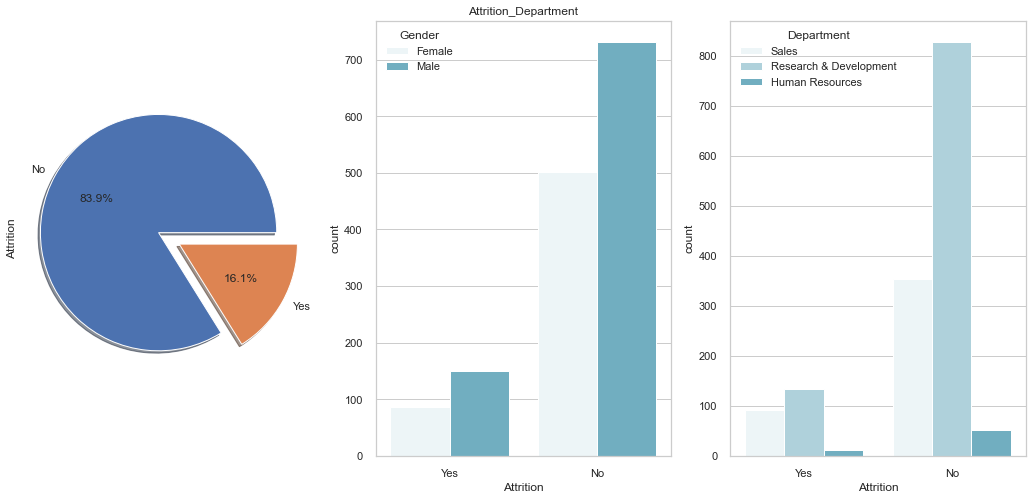

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150


In [163]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
data['Attrition'].value_counts().plot(kind='pie',
                                      explode=[0.1,0.1],
                                      autopct='%1.1f%%',
                                      ax = ax[0],
                                      shadow=True
                                     )
sns.countplot('Attrition', data=data, ax=ax[1], hue ='Gender', color ='c')
ax[1].set_title('Attrition_Gender')

sns.countplot('Attrition', data=data, ax=ax[2], hue ='Department', color = 'c')
ax[1].set_title('Attrition_Department')

plt.show()

print(pd.crosstab(data['Attrition'],data['Gender']))

Attrition의 여부는 대부분 No 였다. 추가적으로 성별별, 부서별 Attrition을 살펴보았다.추가적으로 Gender별 Attrition, Department별 Attrition을 살펴보면 다음과 같다.

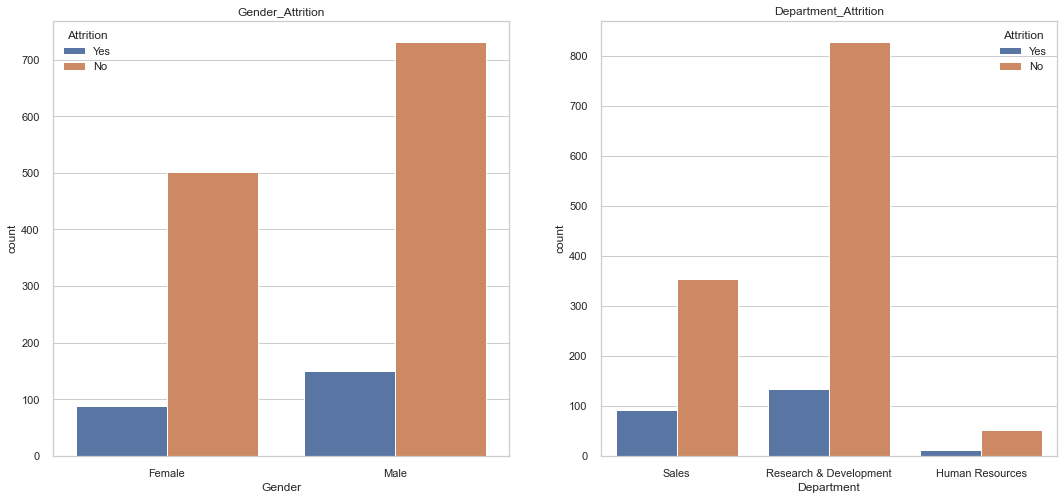

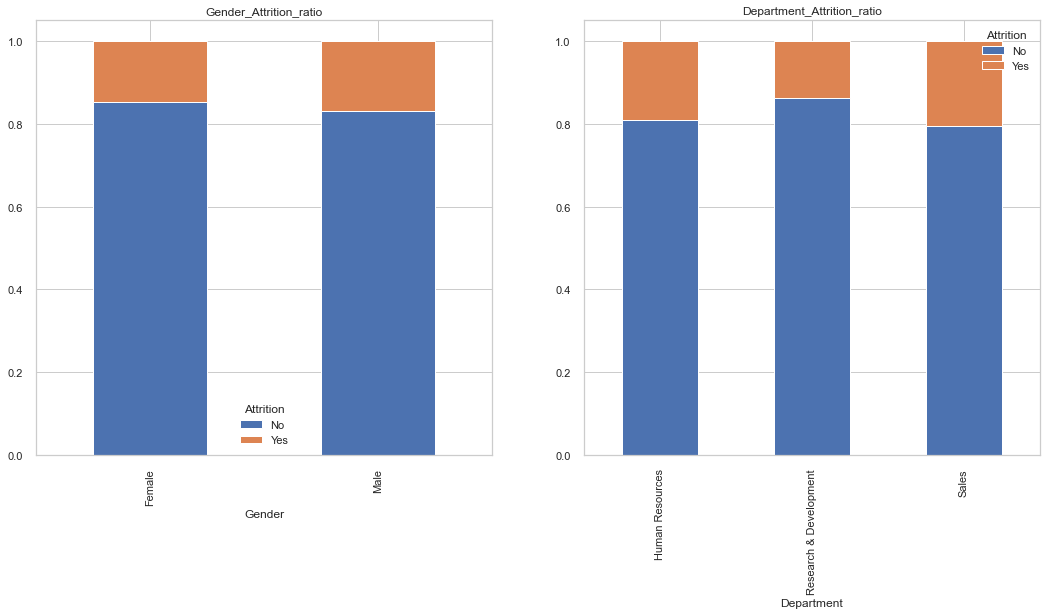

In [186]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
sns.countplot('Gender', data=data, ax=ax[0], hue ='Attrition')
ax[0].set_title('Gender_Attrition')

sns.countplot('Department', data=data, ax=ax[1], hue ='Attrition' )
ax[1].set_title('Department_Attrition')

f2, ax2 = plt.subplots(1,2, figsize=(18, 8))
data.groupby("Gender")['Attrition'].value_counts(normalize=True).unstack().plot(kind="bar", 
                                                                              legend=True , 
                                                                              stacked= True ,
                                                                              ax = ax2[0])
ax2[0].set_title('Gender_Attrition_ratio')

data.groupby("Department")['Attrition'].value_counts(normalize=True).unstack().plot(kind="bar", 
                                                                              legend=True , 
                                                                              stacked= True ,
                                                                                ax = ax2[1]
                                                                              )
ax2[1].set_title('Department_Attrition_ratio')

plt.show()

-> 성별과 부서별 이직률은 유의미한 차이를 보이지 않는다.

### Business Travel

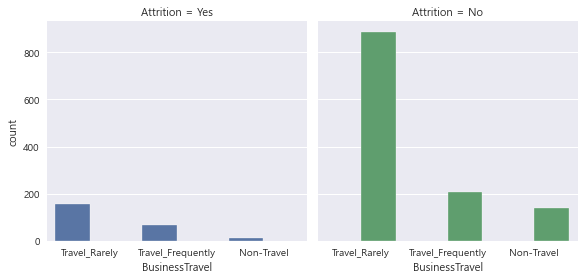

In [320]:
sns.catplot(x="BusinessTravel", hue="Attrition", col="Attrition",
                data=data, kind="count",
                height=4)

Text(0.5, 1.0, 'BusinessTravel_Attrition_ratio')

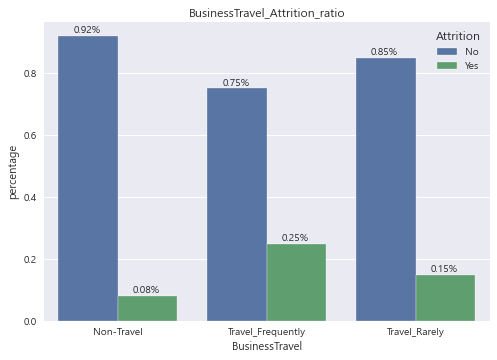

In [350]:
BusinessTravel_count =data.groupby('BusinessTravel')['Attrition'].value_counts(normalize= True).rename('percentage').reset_index()
g = sns.barplot(x ="BusinessTravel", y= 'percentage', hue ='Attrition', data = BusinessTravel_count)
for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+0.1
    txt_y = p.get_height()+0.01
    g.text(txt_x,txt_y,txt)
g.set_title('BusinessTravel_Attrition_ratio')


-> BusinessTravel이 잦을수록 이직률이 높아지는 것을 확인할 수 있다.

### EducationField

In [324]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

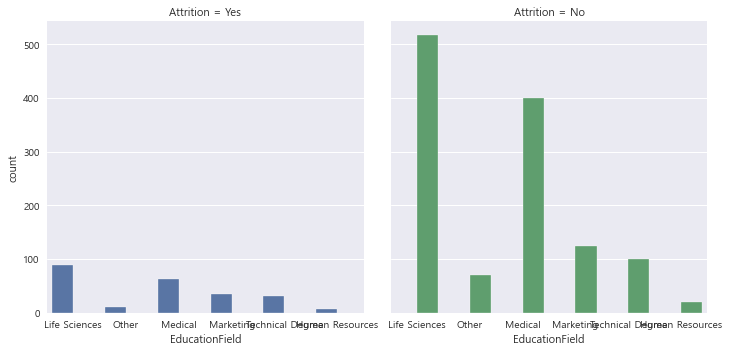

In [345]:
g= sns.catplot(x="EducationField", hue="Attrition", col="Attrition",
                data=data, kind="count")

Text(0.5, 1.0, 'Attrition_EducationField_ratio')

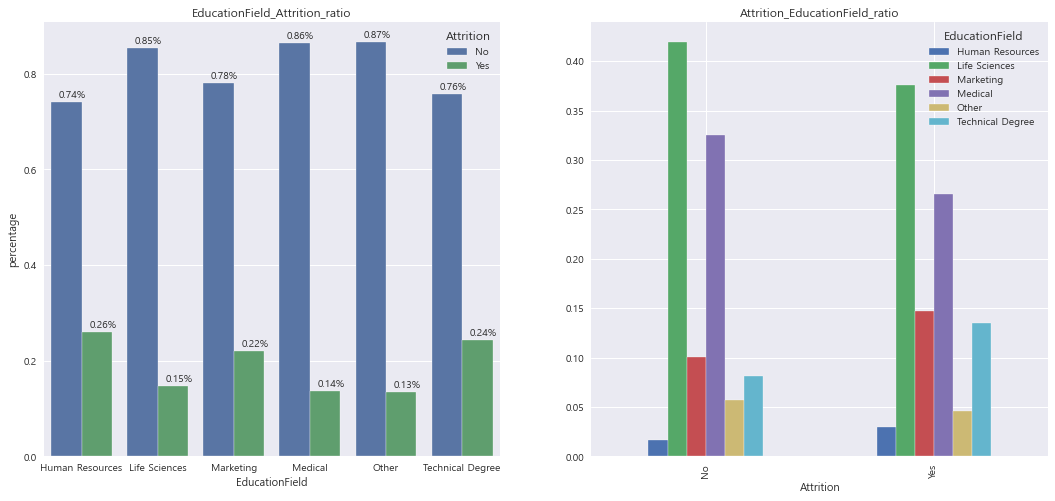

In [353]:
f, ax = plt.subplots(1,2, figsize=(18, 8))


EducationField_count =data.groupby('EducationField')['Attrition'].value_counts(normalize= True).rename('percentage').reset_index()
g = sns.barplot(x ="EducationField", y= 'percentage', hue ='Attrition', data = EducationField_count,ax = ax[0])
for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+0.1
    txt_y = p.get_height()+0.01
    g.text(txt_x,txt_y,txt)
g.set_title('EducationField_Attrition_ratio')

g2 = data.groupby("Attrition")['EducationField'].value_counts(normalize=True).unstack().plot(kind="bar", legend=True,ax = ax[1])
g2.set_title("Attrition_EducationField_ratio")

-> 분야가 HR인 경우 이직율이 가장 높았으며, Technical Degree 뒤 따랐다. 우측 그래프의 경우 이직여부별 Education Field를 나타내고 있는데, Life Science와 medical이 높게 나온 이유는 애초에 표본이 크기 때문으로 해석된다.

### JobInvolvement

In [354]:
data['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

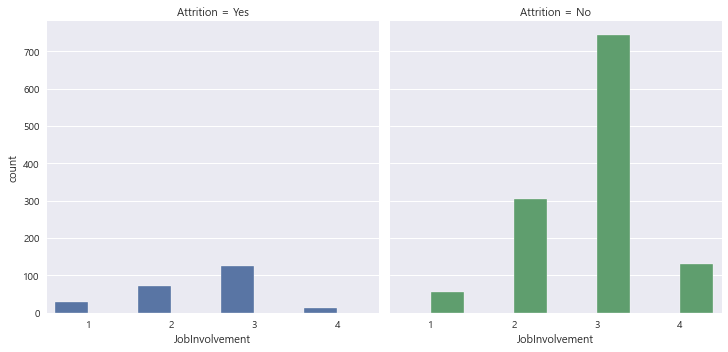

In [355]:
g= sns.catplot(x="JobInvolvement", hue="Attrition", col="Attrition",
                data=data, kind="count")

Text(0.5, 1.0, 'JobInvolvement_Attrition_ratio')

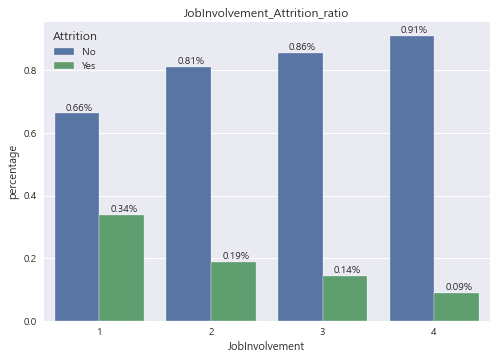

In [357]:
JobInvolvement_count =data.groupby('JobInvolvement')['Attrition'].value_counts(normalize= True).rename('percentage').reset_index()
g = sns.barplot(x ="JobInvolvement", y= 'percentage', hue ='Attrition', data = JobInvolvement_count)
for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+0.1
    txt_y = p.get_height()+0.01
    g.text(txt_x,txt_y,txt)
g.set_title('JobInvolvement_Attrition_ratio')


-> 업무참여도가 낮을수록 이직 비율이 높아짐을 확인할 수 있다.

### MaritalStatus

In [358]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

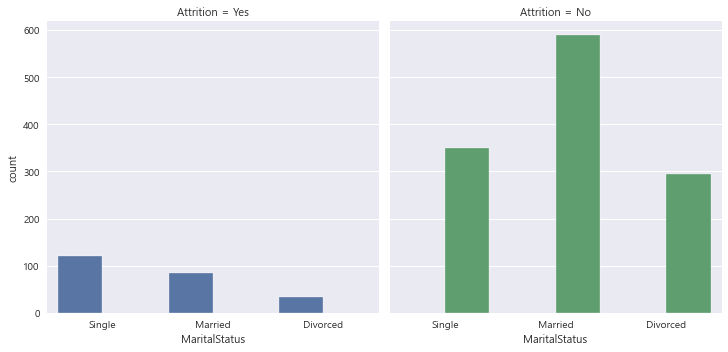

In [359]:
g= sns.catplot(x="MaritalStatus", hue="Attrition", col="Attrition",
                data=data, kind="count")

Text(0.5, 1.0, 'MaritalStatus_Attrition_ratio')

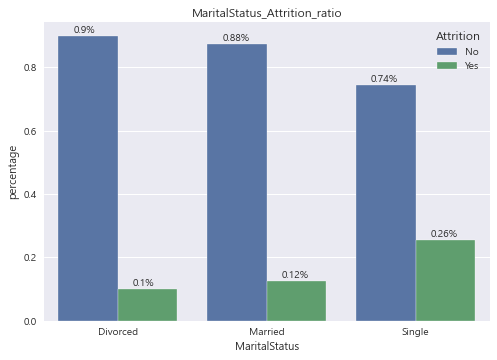

In [360]:
MaritalStatus_count =data.groupby('MaritalStatus')['Attrition'].value_counts(normalize= True).rename('percentage').reset_index()
g = sns.barplot(x ="MaritalStatus", y= 'percentage', hue ='Attrition', data = MaritalStatus_count)
for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+0.1
    txt_y = p.get_height()+0.01
    g.text(txt_x,txt_y,txt)
g.set_title('MaritalStatus_Attrition_ratio')


-> Single일 경우 이직확률이 높음을 확인할 수 있다.

### Overtime

In [362]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

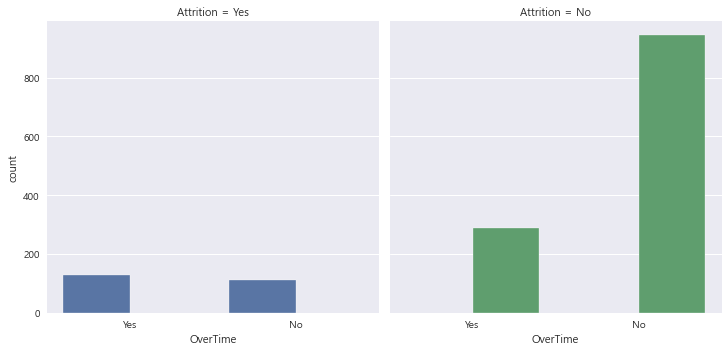

In [363]:
g= sns.catplot(x="OverTime", hue="Attrition", col="Attrition",
                data=data, kind="count")


Text(0.5, 1.0, 'OverTime_Attrition_ratio')

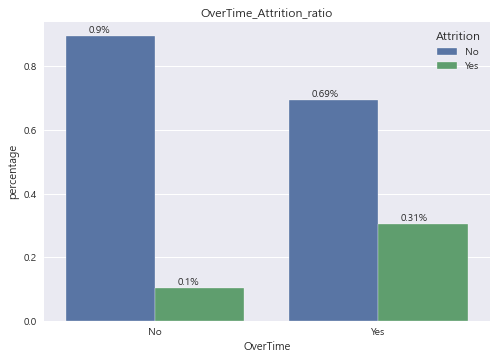

In [364]:

OverTime_count =data.groupby('OverTime')['Attrition'].value_counts(normalize= True).rename('percentage').reset_index()
g = sns.barplot(x ="OverTime", y= 'percentage', hue ='Attrition', data = OverTime_count)
for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+0.1
    txt_y = p.get_height()+0.01
    g.text(txt_x,txt_y,txt)
g.set_title('OverTime_Attrition_ratio')


-> Overtime이 있을 수록 이직률이 높음을 알 수 있다.

### WorklifeBalance

In [370]:
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)

data['WorkLifeBalance'].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

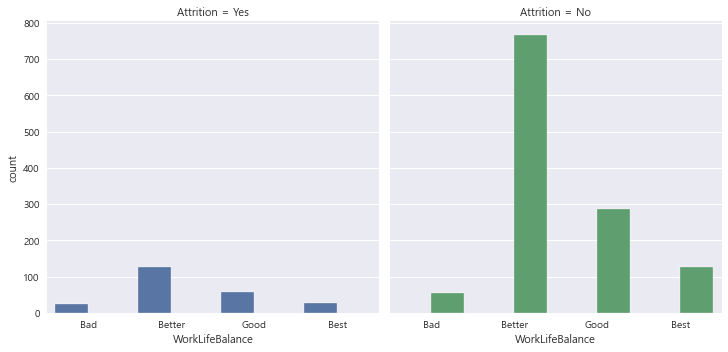

In [371]:
g= sns.catplot(x="WorkLifeBalance", hue="Attrition", col="Attrition",
                data=data, kind="count")


Text(0.5, 1.0, 'WorkLifeBalance_Attrition_ratio')

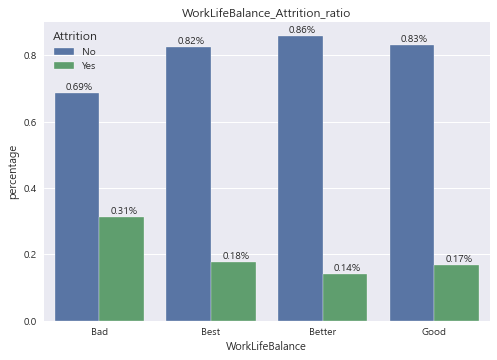

In [372]:

WorkLifeBalance_count =data.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize= True).rename('percentage').reset_index()

g = sns.barplot(x ="WorkLifeBalance", y= 'percentage', hue ='Attrition', data = WorkLifeBalance_count)
for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+0.1
    txt_y = p.get_height()+0.01
    g.text(txt_x,txt_y,txt)
g.set_title('WorkLifeBalance_Attrition_ratio')


-> 워라밸이 Bad인경우 이직률이 월등히 높았으며 Good, Better, Best인 경우 큰 차이를 보이지 않음을 확인할 수 있다.

### JobLevel

In [378]:
data['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

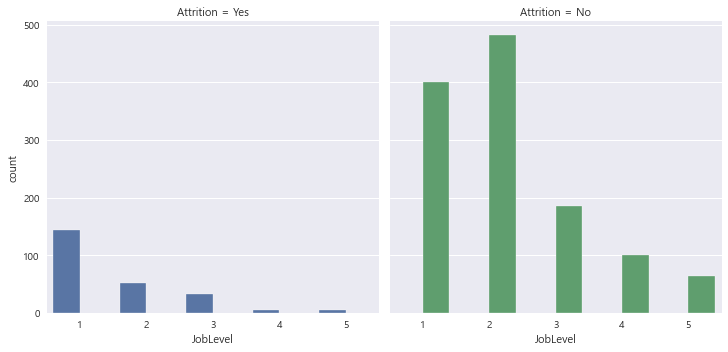

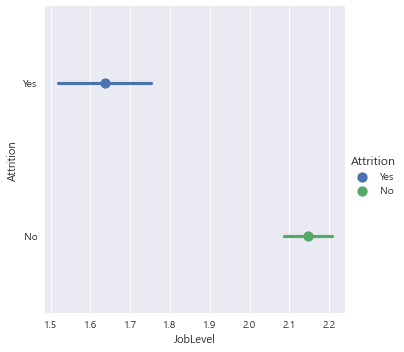

In [414]:
g= sns.catplot(x="JobLevel", hue="Attrition", col="Attrition",
                data=data, kind="count")
g2 = sns.factorplot('JobLevel', 'Attrition',hue = 'Attrition', data=data)
plt.show()

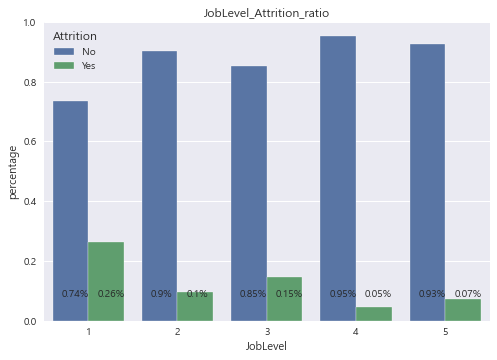

In [416]:

JobLevel_count =data.groupby('JobLevel')['Attrition'].value_counts(normalize= True).rename('percentage').reset_index()

g = sns.barplot(x ="JobLevel", y= 'percentage', hue ='Attrition', data = JobLevel_count)

for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+0.1
    g.text(txt_x,txt_y,txt)
g.set_title('JobLevel_Attrition_ratio')
plt.show()

-> JobLevel이 높을수록 이직률이 매우 낮은 것을 확인 할 수 있다. 다만 Level3일 경우 Level2보다 50%가량 높은 이직률을 보이고 있기 때문에 추가적인 분석이 필요할 것으로 보인다.

### MonthlyIncome

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

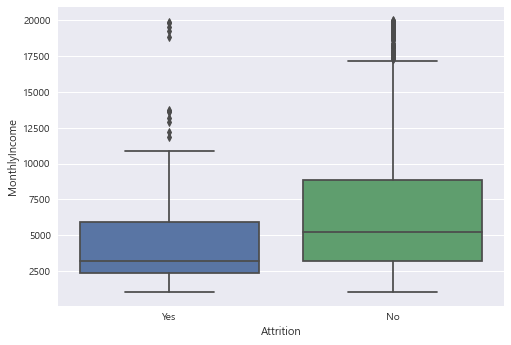

In [387]:
sns.boxplot(x='Attrition', y='MonthlyIncome',data = data )

Text(0.5, 1.0, 'Pclass and Age vs Survived')

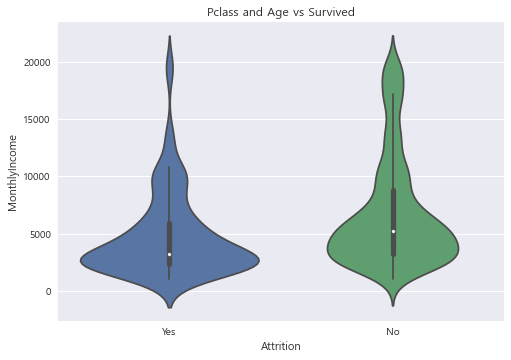

In [423]:
g = sns.violinplot('Attrition',
               'MonthlyIncome',
               data=data
               )
g.set_title('Pclass and Age vs Survived')


-> Boxplot을 보면 월급여가 낮은 사람들(특히, 2500 수준)에서 많은 이직이 있는 것으로 보인다. 또한 이직하지 않은 사람들의 중앙값이 이직한 사람들보다 높게 위치하고 분포도 더욱 큼을 알 수 있다. 
하지만 20000만 달러 근처에서는 다시금 이직비율이 늘어남을 확인 할 수 있다.

## 결론

### 이상치 분석

- EmployeeCount는 모든 값이 1이므로 제거한다.
- StandardHours는 모든 값이 80으로 EDA에서 영향을 주지 않을 것이라고 판단하여 제거한다.
- Over18는 모든 값이 Y이므로 제거한다.

### 결측치 확인

- 결측값이 없음을 확인한다.

### 상관관계 확인

- 히트맵을 통해 상관관계를 확인한다.

### 